<a href="https://colab.research.google.com/github/SamAlrahmani/DS-Unit-1-Sprint-2-Statistics/blob/master/DS_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# TODO
#imports
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',
                 header=None,names=['A1','A2','A3','A4','A5','A6','A7','A8','A9',
                                    'A10','A11','A12','A13','A14','A15','A16'])
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [0]:
df.isnull().sum() 
# dataframe has no null values
df.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [0]:
for i in names:
  print(df[i].value_counts(), '\n')

  #I found some ? in the dataset, I'm going to replace it only in A2 

b    468
a    210
?     12
Name: A1, dtype: int64 

?        12
22.67     9
20.42     7
25.00     6
24.50     6
         ..
59.67     1
44.17     1
58.42     1
15.17     1
33.00     1
Name: A2, Length: 350, dtype: int64 

1.500     21
0.000     19
3.000     19
2.500     19
1.250     16
          ..
12.125     1
13.915     1
22.000     1
12.835     1
10.915     1
Name: A3, Length: 215, dtype: int64 

u    519
y    163
?      6
l      2
Name: A4, dtype: int64 

g     519
p     163
?       6
gg      2
Name: A5, dtype: int64 

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64 

v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64 

0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
3.960     1
2.040     1
1.040     1
4.165     1
5.375     1
Name: A8, Length: 132, dtype: int64 

t

In [0]:
#Replacing the ? in A2 with Nan 
df['A2']= df['A2'].replace({'?':np.NaN})
df['A14']= df['A14'].replace({'?':np.NaN})


# then changing the type to numeric
df['A2'] = pd.to_numeric(df['A2'])
df['A14'] = pd.to_numeric(df['A14'])

In [0]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# TODO
#Exploring Data
#for two categorical i I will use Chi^2
#for Numeric i I will use the T-Test

In [0]:
# Import
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

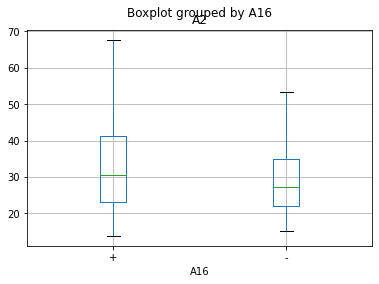

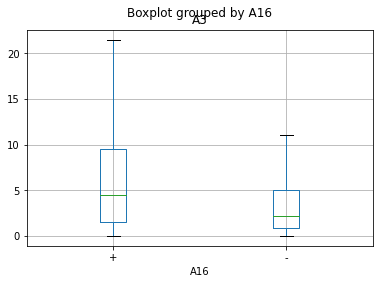

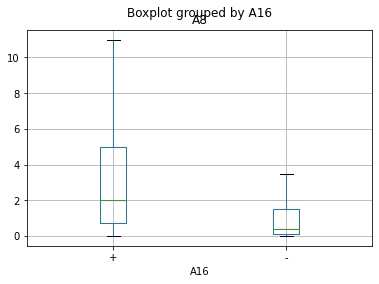

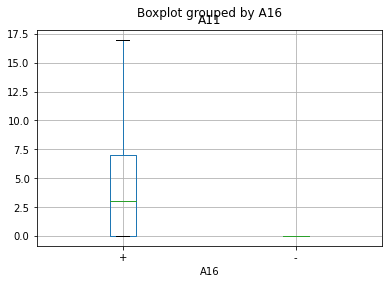

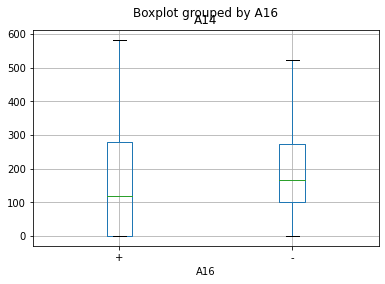

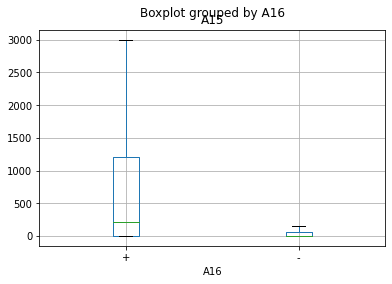

In [0]:
# Visualizing the continuous attributes against class (+,-) using Boxplots:
cols = ["A2", "A3", "A8", "A11", "A14", "A15"]

boxplots = [df.boxplot(column=col, by="A16", showfliers=False) for col in cols]

In [0]:
#find the mean for each
plus.mean()

A2       33.720492
A3        5.904951
A8        3.427899
A11       4.605863
A14     164.421927
A15    2038.859935
dtype: float64

In [0]:
minus.mean()

A2      29.808231
A3       3.839948
A8       1.257924
A11      0.631854
A14    199.699468
A15    198.605744
dtype: float64

In [0]:
#as i I notice the minus group have lower values than the plus so I'm checking for any null values 
plus.isnull().sum()

A1     0
A2     2
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    6
A15    0
A16    0
dtype: int64

In [0]:
minus.isnull().sum() # it showing that minus had more null values than plus but it's not that different . 

A1      0
A2     10
A3      0
A4      0
A5      0
A6      0
A7      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     7
A15     0
A16     0
dtype: int64

In [0]:
#i I will have the A2 t-test 
ttest_ind(plus['A2'], minus['A2'],
          nan_policy='omit')


Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

In [0]:
# then we will have the A15 t-test

ttest_ind(plus['A15'], minus['A15'],
          nan_policy='omit')

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

In [0]:
# will write a function to do the t-test for each numerical cloumn

def ttest_tester(x,y):
  num_com = ['A2','A3','A8','A11','A14','A15']
  for i in num_com:
    print(ttest_ind(x[i], y[i],
          nan_policy='omit'))

In [0]:
ttest_tester(plus, minus)

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)
Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)
Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)
Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)
Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)
Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)


In [125]:
# writing A9 cross table for A16 , A9

A9_cross_tab =pd.crosstab(df['A16'], df['A9'])
A9_cross_tab

A9,f,t
A16,,
+,23,284
-,306,77


In [124]:
# writing A9 Chi^2 test
chi_squared_A9,pvalue_A9,dof_A9,expected_A9 = stats.chi2_contingency(A9_cross_tab)
print(chi_squared_A9)
print(pvalue_A9)
print(dof_A9)
print(expected_A9)

355.2038167412799
3.1185900878457007e-79
1
[[146.38115942 160.61884058]
 [182.61884058 200.38115942]]


In [126]:
# A9 CROSS TABLE for A16 , A10
A10_cross_tab =pd.crosstab(df['A16'], df['A10'])
A10_cross_tab

A10,f,t
A16,,
+,98,209
-,297,86


In [127]:
# writing A10 Chi^2 test

chi_squared_A10,pvalue_A10,dof_A10,expected_A10 = stats.chi2_contingency(A10_cross_tab)
print(chi_squared_A10)
print(pvalue_A10)
print(dof_A10)
print(expected_A10)

143.06956205083145
5.675727374527571e-33
1
[[175.74637681 131.25362319]
 [219.25362319 163.74637681]]


In [129]:
# I'm going to write one-way Chi^2 for categorical features:
from scipy.stats import chisquare 
categorical_feats = [df.A1, df.A4, df.A5, df.A6, df.A7, df.A9, df.A10, df.A12, df.A13]
crosstabs = [pd.crosstab(df.A16, feat) for feat in categorical_feats]

for crosstab in crosstabs:
  print(crosstab)
  print(chisquare(crosstab,axis=None))
  print("\n\n")

A1   ?    a    b
A16             
+    3   98  206
-    9  112  262
Power_divergenceResult(statistic=469.2869565217391, pvalue=3.3914236368487018e-99)



A4   ?  l    u    y
A16                
+    4  2  256   45
-    2  0  263  118
Power_divergenceResult(statistic=1056.991304347826, pvalue=5.825554166604882e-224)



A5   ?    g  gg    p
A16                 
+    4  256   2   45
-    2  263   0  118
Power_divergenceResult(statistic=1056.9913043478261, pvalue=5.825554166604218e-224)



A6   ?  aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                         
+    4  19  62  29   7  14   7  14  3  14  16  51  2  33  32
-    5  35  75  12  23  11  46  45  7  37  22  27  1  31   6
Power_divergenceResult(statistic=447.82608695652175, pvalue=1.397271228892487e-76)



A7   ?  bb  dd  ff   h  j  n  o    v  z
A16                                    
+    4  25   2   8  87  3  2  1  169  6
-    5  34   4  49  51  5  2  1  230  2
Power_divergenceRes

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

#Answer 
##T-test

>the T-test for A2 showed that the graph leaned a little bit to the right and had a low p-value meaning that the result was not random. the ttest came out as (+4) showing that there wasnt much diffrence in both groups mean for A2. The plus group had a higher mean than the minus group but only slightly and the minus group had more null values, here we can just about reject the null Hypothesis that both groups would be the same because. If the minus group had less missing values maybe the null  Hypothesis would be right.

>>The ttest for A15 was suprising to me. I picked the A15 because that's where both groups means differed the most. The test came out with the same results as the first ttest, with +4  as the ttest result and <0.05 as the pvalue. What I took from this result was the that there was not much diffrence between each groups mean but looking at both thier means sepratly I see a big diffrence so...

#################################################
##Chi^2 Test

I did a chi^2  test on two columns that had the same characters to see if they would have similar scores after testing them. 

>The A9 chi^2 test came out high at 355 showing that there is no relationship between the groups (f/t)

>similarly with the A10 chi^ test, it also had a high score but not much so as
 A9 had. 

>>For the categorical features, I  analyzed the relationship between all of them (A1, A4, A5, A6, A7, A9, A10, A12, A13) and getting approved (A16) using a looping one-way Chi^2 Test. I choosed A9 and A13 because they had a small number of features. 

>>For A9 it has a really high test statistic **>357** and I suggests some sort of relationship between it's categorical features and the approval for credit (A16). Viz, the attribute 'f' in A9 appears far more often in cases where applicants were not approved, and the attribute 't' appears  far more often in cases where applicants were approved. 

>>And A13 it has an extreme statistic **>1035** ! probably in part because it has an attribute 'p' with any instances. However, the attribute 'S' appears to have a really different distribution between approved and not approved (likely to be not approved).


--------------------------------------------------


*The Challenge !*
--------------


**I think the hardest aspect was How much work I should put in the data and deciding what to start with and how to pick specific data annd why, its very easy to get lost.**

-------------------------------------------------------------------------










## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.




>>As I explained in my email to the adminadministration of Lambda I had a  difficdifficulty during last week to catch the lectures about the Bayesian due to my traveling to get my new job after lost my old one due to COVID-19 . so I'm not going to be able to finish this part of the challchallenge . I do understand the logic of the Bayesian but I'm not able to related it with the data up there yet . 

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.